In [1]:
import pandas as pd
import numpy as np
import yaml
import math
import os
import matplotlib.pyplot as plt
import scipy.stats

min_overs = 80
min_pair_overs = 16  # 1/5th of min_overs

In [3]:
og_data = pd.read_csv('/home/pnans/Documents/Projects/Bowlership/T20out.csv')
bovercnt = og_data.groupby('bowler').count()
bovercnt = bovercnt.drop(['runs', 'wicket'], axis =1)
qbovercnt = bovercnt.loc[bovercnt['over'] >= min_overs]

pd.set_option('display.max_rows', 10000)
qbovercnt

,over
bowler,
A Mohammed,104
A Shrubsole,107
AD Mathews,92
AU Rashid,81
B Kumar,81
CJ Jordan,97
D Hazell,89
D van Niekerk,89
DJ Bravo,101


In [4]:
paired_data = pd.read_csv('/home/pnans/Documents/Projects/Bowlership/T20pair.csv')
paired_data

,runs1,wicket1,over1,bowler1,runs2,wicket2,over2,bowler2
0,10,1,1,ST Finn,10,0,2,SCJ Broad
1,12,1,3,ST Finn,5,0,4,GP Swann
2,4,1,5,LJ Wright,6,1,6,GP Swann
3,3,1,7,JW Dernbach,18,0,8,SCJ Broad
4,0,1,1,C Sutthiruang,0,0,2,R Padunglerd
...,...,...,...,...,...,...,...,...
13241,7,0,9,ST Jayasuriya,11,0,10,TM Dilshan
13242,3,1,11,ST Jayasuriya,20,0,12,TM Dilshan
13243,3,1,13,BAW Mendis,9,0,14,HMCM Bandara
13244,6,0,15,BAW Mendis,7,1,16,ST Jayasuriya


In [5]:
pairdf = paired_data.groupby(['bowler1','bowler2']).size().append(paired_data.groupby(['bowler2','bowler1']).size())
pairdf

bowler1      bowler2           
A Aitken     K Fraser              3
             K McGill              1
             RS Glen               1
             S Haggo               1
A Bohara     J Kila                1
                                  ..
Zumika Azmi  Mas Elysa             2
             Nur Arianna Natsya    2
             Nur Nadihirah         4
             Sasha Azmi            6
             WA Duraisingam        1
Length: 13110, dtype: int64

In [6]:
bnames = qbovercnt.index
Bpartners = {}
for name in bnames:
    Bpartners[name] = []
    Bpartners[name] = paired_data.query('bowler1 == @name')['bowler2'].append(paired_data.query('bowler2 == @name')['bowler1']).unique()

Bpartners

{'A Mohammed': array(['ASS Fletcher', 'DJS Dottin', 'SS Connell', 'SF Daley',
        'SA Campbelle', 'HK Matthews', 'SL Quintyne', 'SR Taylor',
        'S Gajnabi', 'KH Brunt', 'Amir Hamza', 'AK Peters', 'CA Young',
        'TD Smartt', 'SACA King', 'CA Henry', 'SC Selman', 'SL Munroe'],
       dtype=object),
 'A Shrubsole': array(['KH Brunt', 'LCN Smith', 'HL Colvin', 'FR Davies', 'S Ecclestone',
        'S Glenn', 'NR Sciver', 'KL Gordon', 'WA Duraisingam', 'KL George',
        'D Hazell', 'RL Grundy', 'LA Marsh', 'A Brindle', 'DN Wyatt',
        'NE Farrant', 'KA Pollard', 'HC Knight', 'H Kaur', 'N Pradeep',
        'JE Taylor', 'JL Gunn', 'KL Cross', 'R Padunglerd', 'DB Sharma'],
       dtype=object),
 'AD Mathews': array(['KMDN Kulasekara', 'RMS Eranga', 'BAW Mendis', 'A Dananjaya',
        'SL Malinga', 'I Udana', 'PVD Chameera', 'HMRKB Herath',
        'UWMBCA Welegedara', 'BMAJ Mendis', 'NLTC Perera', 'PWH de Silva',
        'CBRLS Kumara', 'B Fernando', 'SMSM Senanayake', 'N 

In [7]:
paircnt = 0 
for k, v in Bpartners.items():
    for name in v:
        povercnt = pairdf[k][name].sum()
        if (povercnt >= min_pair_overs):
            if(k<name):
                print(k,name, povercnt)
                paircnt += 1
print(paircnt)

A Shrubsole KH Brunt 31
AD Mathews KMDN Kulasekara 25
DJ Bravo SJ Benn 20
EA Perry ML Schutt 29
GH Dockrell KJ O'Brien 18
GH Dockrell WB Rankin 16
JL Jonassen ML Schutt 17
KMDN Kulasekara SL Malinga 23
M Kapp S Ismail 35
Mashrafe Mortaza Shakib Al Hasan 16
Mohammad Hafeez Shahid Afridi 40
Mohammad Nabi Rashid Khan 18
Nida Dar Sadia Yousuf 29
Poonam Yadav RP Yadav 20
R Ashwin RA Jadeja 19
Saeed Ajmal Umar Gul 25
Saeed Ajmal Shahid Afridi 30
Shahid Afridi Shoaib Malik 19
18


In [8]:
bocnt = 0 
Bpartner_qualified = {}
for k, v in Bpartners.items():
    Bpartner_qualified[k] = []
    for name in v:
        bocnt = pairdf[k][name].sum()
        if (bocnt >= min_pair_overs):
            Bpartner_qualified[k].append(name)

for k,v in Bpartners.items():
    if Bpartner_qualified[k] == []:
        del Bpartner_qualified[k]
            
#Bpartner_qualified
print(len(Bpartner_qualified))
print(Bpartner_qualified)

28
{'A Shrubsole': ['KH Brunt'], 'AD Mathews': ['KMDN Kulasekara'], 'DJ Bravo': ['SJ Benn'], 'EA Perry': ['ML Schutt'], 'GH Dockrell': ["KJ O'Brien", 'WB Rankin'], 'JL Jonassen': ['ML Schutt'], 'KH Brunt': ['A Shrubsole'], 'KMDN Kulasekara': ['SL Malinga', 'AD Mathews'], 'M Kapp': ['S Ismail'], 'ML Schutt': ['JL Jonassen', 'EA Perry'], 'Mashrafe Mortaza': ['Shakib Al Hasan'], 'Mohammad Hafeez': ['Shahid Afridi'], 'Mohammad Nabi': ['Rashid Khan'], 'Nida Dar': ['Sadia Yousuf'], 'Poonam Yadav': ['RP Yadav'], 'R Ashwin': ['RA Jadeja'], 'RA Jadeja': ['R Ashwin'], 'Rashid Khan': ['Mohammad Nabi'], 'Rumana Ahmed': ['Fahima Khatun', 'Khadija Tul Kubra'], 'S Ismail': ['M Kapp'], 'SL Malinga': ['KMDN Kulasekara'], 'Saeed Ajmal': ['Umar Gul', 'Shahid Afridi'], 'Salma Khatun': ['Jahanara Alam'], 'Sana Mir': ['Sadia Yousuf'], 'Shahid Afridi': ['Saeed Ajmal', 'Shoaib Malik', 'Mohammad Hafeez'], 'Shakib Al Hasan': ['Mashrafe Mortaza', 'Mustafizur Rahman', 'Mahmudullah'], 'Umar Gul': ['Saeed Ajmal'], 

In [9]:
for name in Bpartner_qualified.keys():
    dfbowler = og_data.loc[og_data['bowler'] == name]
    for pname in Bpartner_qualified[name]:
        dfpairab = paired_data.loc[paired_data['bowler1']==name] 
        dfpairab = dfpairab.loc[dfpairab['bowler2']==pname]
        dfpairba = paired_data.loc[paired_data['bowler2']==name]
        dfpairba = dfpairba.loc[dfpairba['bowler1']==pname]
        break
dfpairba

,runs1,wicket1,over1,bowler1,runs2,wicket2,over2,bowler2
2630,4,1,1,GH Dockrell,4,0,2,WB Rankin
2631,3,1,3,GH Dockrell,0,1,4,WB Rankin
6529,8,0,11,GH Dockrell,4,1,12,WB Rankin
7158,8,0,9,GH Dockrell,2,0,10,WB Rankin
9125,7,0,18,GH Dockrell,6,1,19,WB Rankin
12479,7,0,11,GH Dockrell,4,0,12,WB Rankin
12482,17,0,17,GH Dockrell,3,1,18,WB Rankin


In [10]:
dfbowler = og_data.loc[og_data['bowler'] == name]
dfbowler

,runs,wicket,over,bowler
887,10,0,1,WB Rankin
889,6,0,3,WB Rankin
891,12,0,5,WB Rankin
905,8,1,19,WB Rankin
3051,3,0,2,WB Rankin
3055,5,0,6,WB Rankin
3063,17,0,14,WB Rankin
3066,13,1,17,WB Rankin
4790,14,0,2,WB Rankin
4793,11,2,5,WB Rankin


A Shrubsole KH Brunt


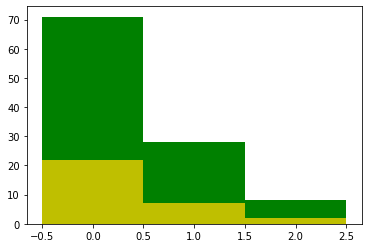

Bowler's Hitrate  :  0.411214953271028
Bowlership's Hitrate  :  0.3548387096774194


Bowler's Skew     :  1.2530313665518997
Bowlership's Skew :  0.5280049792181877
Bowler's Kurtosis     :  0.4344997895182501
Bowlership's Kurtosis :  -1.4999999999999998


Greater : Statistics=8.00, p=0.10 
Two-Sided : Statistics=8.00, p=0.19 
Less : Statistics=8.00, p=0.96 

____________________________________________


AD Mathews KMDN Kulasekara


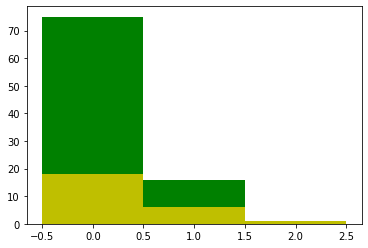

Bowler's Hitrate  :  0.1956521739130435
Bowlership's Hitrate  :  0.32


Bowler's Skew     :  1.9557237785773942
Bowlership's Skew :  0.4556385926118875
Bowler's Kurtosis     :  2.8976267221754215
Bowlership's Kurtosis :  -1.5


Greater : Statistics=5.50, p=0.41 
Two-Sided : Statistics=5.50, p=0.82 
Less : Statistics=5.50, p=0.75 

____________________________________________


DJ Bravo SJ Benn


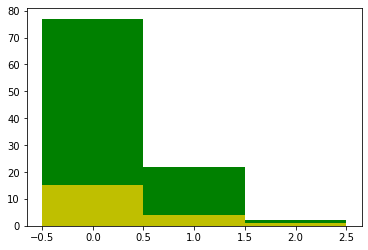

Bowler's Hitrate  :  0.25742574257425743
Bowlership's Hitrate  :  0.3


Bowler's Skew     :  1.6324981580646512
Bowlership's Skew :  0.5776336923662017
Bowler's Kurtosis     :  1.7354552600862316
Bowlership's Kurtosis :  -1.5000000000000004


Greater : Statistics=7.00, p=0.19 
Two-Sided : Statistics=7.00, p=0.38 
Less : Statistics=7.00, p=0.90 

____________________________________________


EA Perry ML Schutt


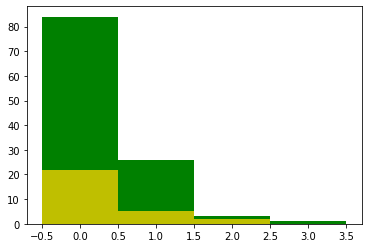

Bowler's Hitrate  :  0.30701754385964913
Bowlership's Hitrate  :  0.3103448275862069


Bowler's Skew     :  1.9715622699384485
Bowlership's Skew :  0.6460623932049135
Bowler's Kurtosis     :  4.283932227076605
Bowlership's Kurtosis :  -1.5


Greater : Statistics=7.00, p=0.43 
Two-Sided : Statistics=7.00, p=0.86 
Less : Statistics=7.00, p=0.70 

____________________________________________


GH Dockrell KJ O'Brien


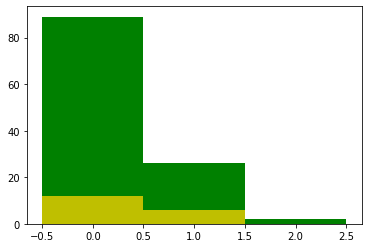

Bowler's Hitrate  :  0.2564102564102564
Bowlership's Hitrate  :  0.3333333333333333


Bowler's Skew     :  1.5864812277057225
Bowlership's Skew :  0.0
Bowler's Kurtosis     :  1.5336513799117668
Bowlership's Kurtosis :  -2.0


Greater : Statistics=4.00, p=0.39 
Two-Sided : Statistics=4.00, p=0.77 
Less : Statistics=4.00, p=0.81 

____________________________________________


GH Dockrell WB Rankin


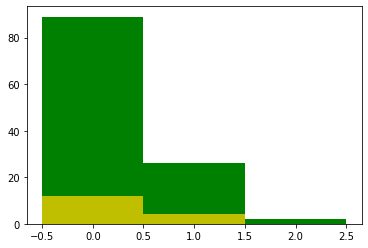

Bowler's Hitrate  :  0.2564102564102564
Bowlership's Hitrate  :  0.25


Bowler's Skew     :  1.5864812277057225
Bowlership's Skew :  0.0
Bowler's Kurtosis     :  1.5336513799117668
Bowlership's Kurtosis :  -2.0


Greater : Statistics=4.00, p=0.39 
Two-Sided : Statistics=4.00, p=0.77 
Less : Statistics=4.00, p=0.81 

____________________________________________


JL Jonassen ML Schutt


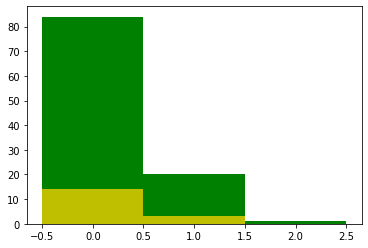

Bowler's Hitrate  :  0.20952380952380953
Bowlership's Hitrate  :  0.17647058823529413


Bowler's Skew     :  1.7816333865927283
Bowlership's Skew :  0.0
Bowler's Kurtosis     :  2.0959477923892536
Bowlership's Kurtosis :  -2.0


Greater : Statistics=4.00, p=0.39 
Two-Sided : Statistics=4.00, p=0.77 
Less : Statistics=4.00, p=0.81 

____________________________________________


KH Brunt A Shrubsole


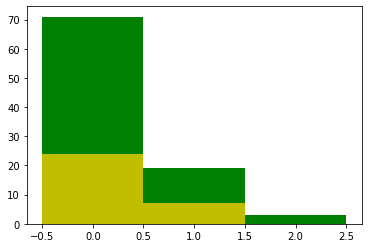

Bowler's Hitrate  :  0.26881720430107525
Bowlership's Hitrate  :  0.22580645161290322


Bowler's Skew     :  1.742198944008103
Bowlership's Skew :  0.0
Bowler's Kurtosis     :  2.1662770144691734
Bowlership's Kurtosis :  -2.0


Greater : Statistics=3.00, p=0.61 
Two-Sided : Statistics=3.00, p=0.77 
Less : Statistics=3.00, p=0.61 

____________________________________________


KMDN Kulasekara SL Malinga


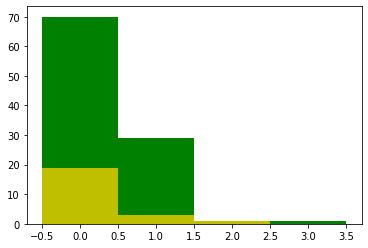

Bowler's Hitrate  :  0.33663366336633666
Bowlership's Hitrate  :  0.21739130434782608


Bowler's Skew     :  1.7428871528902499
Bowlership's Skew :  0.6745554845457656
Bowler's Kurtosis     :  3.9767051585379853
Bowlership's Kurtosis :  -1.5


Greater : Statistics=7.00, p=0.43 
Two-Sided : Statistics=7.00, p=0.85 
Less : Statistics=7.00, p=0.71 

____________________________________________


KMDN Kulasekara AD Mathews


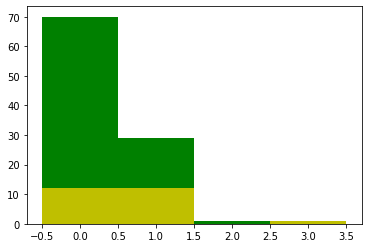

Bowler's Hitrate  :  0.33663366336633666
Bowlership's Hitrate  :  0.6


Bowler's Skew     :  1.7428871528902499
Bowlership's Skew :  -0.7071067811865479
Bowler's Kurtosis     :  3.9767051585379853
Bowlership's Kurtosis :  -1.4999999999999993


Greater : Statistics=7.00, p=0.43 
Two-Sided : Statistics=7.00, p=0.85 
Less : Statistics=7.00, p=0.71 

____________________________________________


M Kapp S Ismail


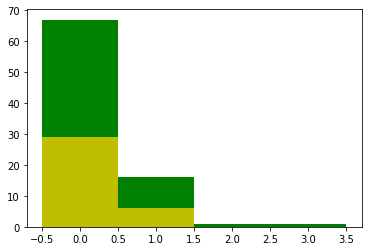

Bowler's Hitrate  :  0.24705882352941178
Bowlership's Hitrate  :  0.17142857142857143


Bowler's Skew     :  2.544567759860782
Bowlership's Skew :  0.0
Bowler's Kurtosis     :  7.834211790529464
Bowlership's Kurtosis :  -2.0


Greater : Statistics=3.00, p=0.76 
Two-Sided : Statistics=3.00, p=0.81 
Less : Statistics=3.00, p=0.41 

____________________________________________


ML Schutt JL Jonassen


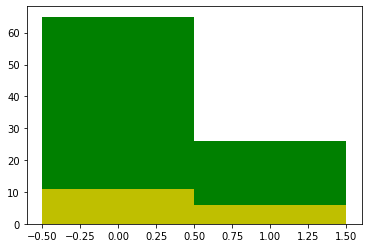

Bowler's Hitrate  :  0.2857142857142857
Bowlership's Hitrate  :  0.35294117647058826


Bowler's Skew     :  0.948683298050514
Bowlership's Skew :  0.0
Bowler's Kurtosis     :  -1.1
Bowlership's Kurtosis :  -2.0


Greater : Statistics=4.00, p=0.12 
Two-Sided : Statistics=4.00, p=0.25 
Less : Statistics=4.00, p=0.97 

____________________________________________


ML Schutt EA Perry


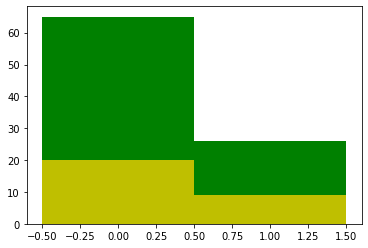

Bowler's Hitrate  :  0.2857142857142857
Bowlership's Hitrate  :  0.3103448275862069


Bowler's Skew     :  0.948683298050514
Bowlership's Skew :  0.0
Bowler's Kurtosis     :  -1.1
Bowlership's Kurtosis :  -2.0


Greater : Statistics=4.00, p=0.12 
Two-Sided : Statistics=4.00, p=0.25 
Less : Statistics=4.00, p=0.97 

____________________________________________


Mashrafe Mortaza Shakib Al Hasan


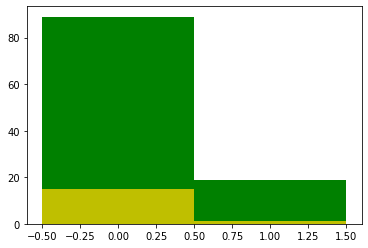

Bowler's Hitrate  :  0.17592592592592593
Bowlership's Hitrate  :  0.0625


Bowler's Skew     :  1.7022613408002905
Bowlership's Skew :  0.0
Bowler's Kurtosis     :  0.8976936723832027
Bowlership's Kurtosis :  -2.0


Greater : Statistics=4.00, p=0.12 
Two-Sided : Statistics=4.00, p=0.25 
Less : Statistics=4.00, p=0.97 

____________________________________________


Mohammad Hafeez Shahid Afridi


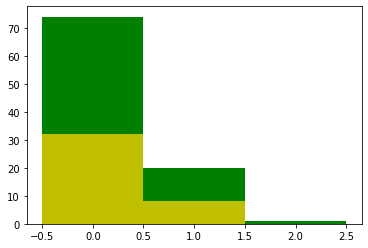

Bowler's Hitrate  :  0.23157894736842105
Bowlership's Hitrate  :  0.2


Bowler's Skew     :  1.622795221950238
Bowlership's Skew :  0.0
Bowler's Kurtosis     :  1.509604367041832
Bowlership's Kurtosis :  -2.0


Greater : Statistics=3.00, p=0.61 
Two-Sided : Statistics=3.00, p=0.77 
Less : Statistics=3.00, p=0.61 

____________________________________________


Mohammad Nabi Rashid Khan


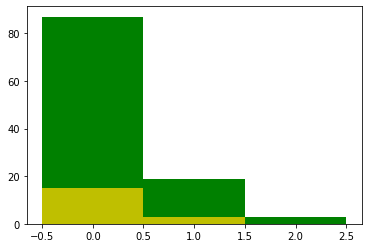

Bowler's Hitrate  :  0.22935779816513763
Bowlership's Hitrate  :  0.16666666666666666


Bowler's Skew     :  1.9976201694231996
Bowlership's Skew :  0.0
Bowler's Kurtosis     :  3.2203070044284967
Bowlership's Kurtosis :  -2.0


Greater : Statistics=4.50, p=0.28 
Two-Sided : Statistics=4.50, p=0.55 
Less : Statistics=4.50, p=0.88 

____________________________________________


Nida Dar Sadia Yousuf


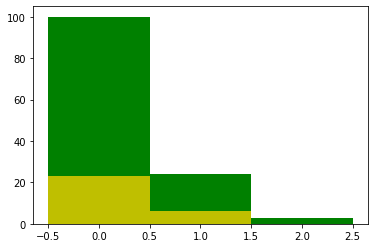

Bowler's Hitrate  :  0.23622047244094488
Bowlership's Hitrate  :  0.20689655172413793


Bowler's Skew     :  1.8727594541071888
Bowlership's Skew :  0.0
Bowler's Kurtosis     :  2.698732325174076
Bowlership's Kurtosis :  -2.0


Greater : Statistics=4.00, p=0.39 
Two-Sided : Statistics=4.00, p=0.77 
Less : Statistics=4.00, p=0.81 

____________________________________________


Poonam Yadav RP Yadav


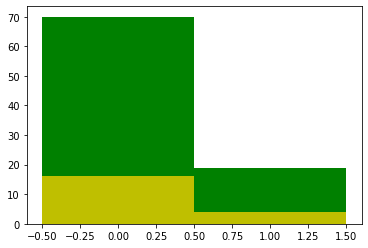

Bowler's Hitrate  :  0.21348314606741572
Bowlership's Hitrate  :  0.2


Bowler's Skew     :  1.3984416676230584
Bowlership's Skew :  0.0
Bowler's Kurtosis     :  -0.04436090225563927
Bowlership's Kurtosis :  -2.0


Greater : Statistics=4.00, p=0.12 
Two-Sided : Statistics=4.00, p=0.25 
Less : Statistics=4.00, p=0.97 

____________________________________________


R Ashwin RA Jadeja


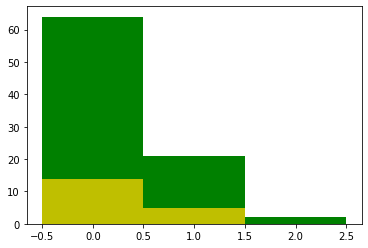

Bowler's Hitrate  :  0.28735632183908044
Bowlership's Hitrate  :  0.2631578947368421


Bowler's Skew     :  1.476362799257197
Bowlership's Skew :  0.0
Bowler's Kurtosis     :  1.2151668718999886
Bowlership's Kurtosis :  -2.0


Greater : Statistics=4.00, p=0.39 
Two-Sided : Statistics=4.00, p=0.77 
Less : Statistics=4.00, p=0.81 

____________________________________________


RA Jadeja R Ashwin


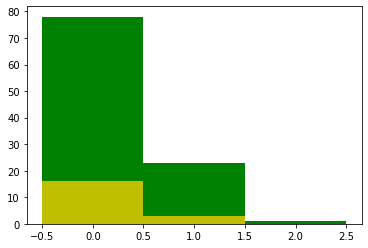

Bowler's Hitrate  :  0.24509803921568626
Bowlership's Hitrate  :  0.15789473684210525


Bowler's Skew     :  1.498701427446484
Bowlership's Skew :  0.0
Bowler's Kurtosis     :  1.0352494274309407
Bowlership's Kurtosis :  -2.0


Greater : Statistics=4.00, p=0.39 
Two-Sided : Statistics=4.00, p=0.77 
Less : Statistics=4.00, p=0.81 

____________________________________________


Rashid Khan Mohammad Nabi


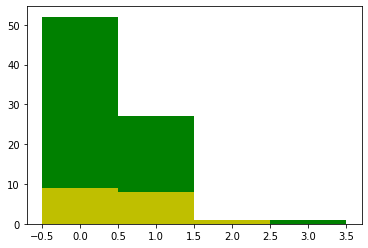

Bowler's Hitrate  :  0.3950617283950617
Bowlership's Hitrate  :  0.5555555555555556


Bowler's Skew     :  1.546039177726628
Bowlership's Skew :  -0.6654688661238353
Bowler's Kurtosis     :  3.229599466955131
Bowlership's Kurtosis :  -1.5


Greater : Statistics=7.00, p=0.43 
Two-Sided : Statistics=7.00, p=0.85 
Less : Statistics=7.00, p=0.71 

____________________________________________


Rumana Ahmed Fahima Khatun


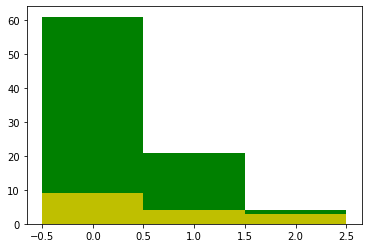

Bowler's Hitrate  :  0.3372093023255814
Bowlership's Hitrate  :  0.625


Bowler's Skew     :  1.4473101800222663
Bowlership's Skew :  0.6309038567106242
Bowler's Kurtosis     :  1.1108623809618523
Bowlership's Kurtosis :  -1.4999999999999998


Greater : Statistics=7.50, p=0.13 
Two-Sided : Statistics=7.50, p=0.27 
Less : Statistics=7.50, p=0.94 

____________________________________________


Rumana Ahmed Khadija Tul Kubra


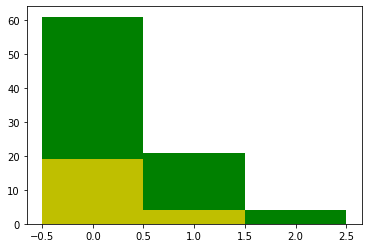

Bowler's Hitrate  :  0.3372093023255814
Bowlership's Hitrate  :  0.17391304347826086


Bowler's Skew     :  1.4473101800222663
Bowlership's Skew :  0.0
Bowler's Kurtosis     :  1.1108623809618523
Bowlership's Kurtosis :  -2.0


Greater : Statistics=4.50, p=0.28 
Two-Sided : Statistics=4.50, p=0.55 
Less : Statistics=4.50, p=0.88 

____________________________________________


S Ismail M Kapp


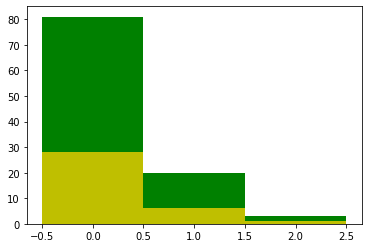

Bowler's Hitrate  :  0.25
Bowlership's Hitrate  :  0.22857142857142856


Bowler's Skew     :  1.8413203639081694
Bowlership's Skew :  0.6119472855509787
Bowler's Kurtosis     :  2.5628604382929643
Bowlership's Kurtosis :  -1.4999999999999998


Greater : Statistics=6.00, p=0.33 
Two-Sided : Statistics=6.00, p=0.66 
Less : Statistics=6.00, p=0.81 

____________________________________________


SL Malinga KMDN Kulasekara


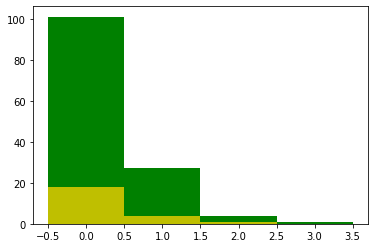

Bowler's Hitrate  :  0.2857142857142857
Bowlership's Hitrate  :  0.2608695652173913


Bowler's Skew     :  2.081559936766435
Bowlership's Skew :  0.6211463696237003
Bowler's Kurtosis     :  4.584056712962969
Bowlership's Kurtosis :  -1.5000000000000004


Greater : Statistics=8.00, p=0.29 
Two-Sided : Statistics=8.00, p=0.59 
Less : Statistics=8.00, p=0.82 

____________________________________________


Saeed Ajmal Umar Gul


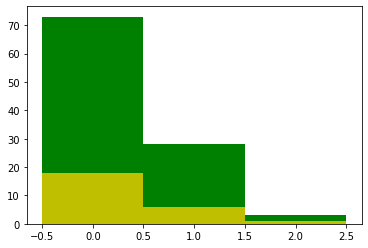

Bowler's Hitrate  :  0.3269230769230769
Bowlership's Hitrate  :  0.32


Bowler's Skew     :  1.3162824761933098
Bowlership's Skew :  0.4556385926118875
Bowler's Kurtosis     :  0.7503993787245067
Bowlership's Kurtosis :  -1.5


Greater : Statistics=7.00, p=0.19 
Two-Sided : Statistics=7.00, p=0.38 
Less : Statistics=7.00, p=0.90 

____________________________________________


Saeed Ajmal Shahid Afridi


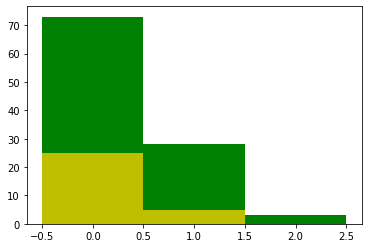

Bowler's Hitrate  :  0.3269230769230769
Bowlership's Hitrate  :  0.16666666666666666


Bowler's Skew     :  1.3162824761933098
Bowlership's Skew :  0.0
Bowler's Kurtosis     :  0.7503993787245067
Bowlership's Kurtosis :  -2.0


Greater : Statistics=4.00, p=0.39 
Two-Sided : Statistics=4.00, p=0.77 
Less : Statistics=4.00, p=0.81 

____________________________________________


Salma Khatun Jahanara Alam


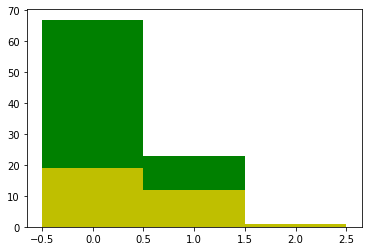

Bowler's Hitrate  :  0.27472527472527475
Bowlership's Hitrate  :  0.4375


Bowler's Skew     :  1.3223058417363474
Bowlership's Skew :  -0.26412382286051755
Bowler's Kurtosis     :  0.5039508685951852
Bowlership's Kurtosis :  -1.5000000000000002


Greater : Statistics=6.50, p=0.25 
Two-Sided : Statistics=6.50, p=0.51 
Less : Statistics=6.50, p=0.87 

____________________________________________


Sana Mir Sadia Yousuf


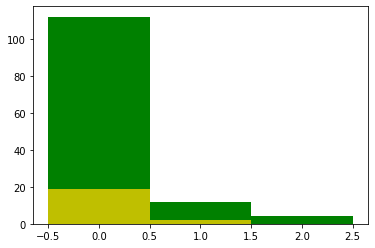

Bowler's Hitrate  :  0.15625
Bowlership's Hitrate  :  0.09523809523809523


Bowler's Skew     :  2.9046318319788798
Bowlership's Skew :  0.0
Bowler's Kurtosis     :  7.833994091058306
Bowlership's Kurtosis :  -2.0


Greater : Statistics=4.00, p=0.39 
Two-Sided : Statistics=4.00, p=0.77 
Less : Statistics=4.00, p=0.81 

____________________________________________


Shahid Afridi Saeed Ajmal


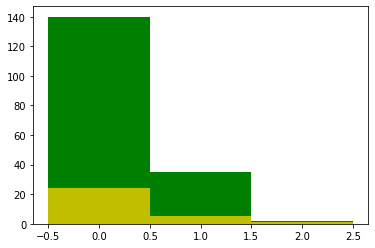

Bowler's Hitrate  :  0.22033898305084745
Bowlership's Hitrate  :  0.23333333333333334


Bowler's Skew     :  1.7378700637221722
Bowlership's Skew :  0.6237520947068693
Bowler's Kurtosis     :  1.9825887548836425
Bowlership's Kurtosis :  -1.5000000000000002


Greater : Statistics=7.00, p=0.19 
Two-Sided : Statistics=7.00, p=0.38 
Less : Statistics=7.00, p=0.90 

____________________________________________


Shahid Afridi Shoaib Malik


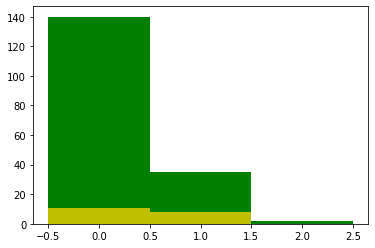

Bowler's Hitrate  :  0.22033898305084745
Bowlership's Hitrate  :  0.42105263157894735


Bowler's Skew     :  1.7378700637221722
Bowlership's Skew :  0.0
Bowler's Kurtosis     :  1.9825887548836425
Bowlership's Kurtosis :  -2.0


Greater : Statistics=4.00, p=0.39 
Two-Sided : Statistics=4.00, p=0.77 
Less : Statistics=4.00, p=0.81 

____________________________________________


Shahid Afridi Mohammad Hafeez


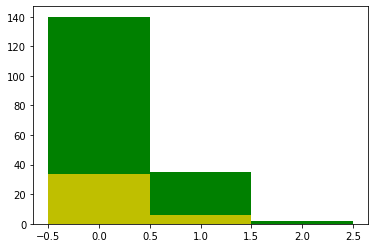

Bowler's Hitrate  :  0.22033898305084745
Bowlership's Hitrate  :  0.15


Bowler's Skew     :  1.7378700637221722
Bowlership's Skew :  0.0
Bowler's Kurtosis     :  1.9825887548836425
Bowlership's Kurtosis :  -2.0


Greater : Statistics=4.00, p=0.39 
Two-Sided : Statistics=4.00, p=0.77 
Less : Statistics=4.00, p=0.81 

____________________________________________


Shakib Al Hasan Mashrafe Mortaza


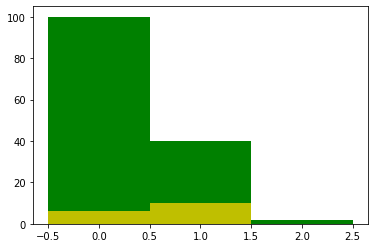

Bowler's Hitrate  :  0.30985915492957744
Bowlership's Hitrate  :  0.625


Bowler's Skew     :  1.1728878995494725
Bowlership's Skew :  0.0
Bowler's Kurtosis     :  0.16408223595807536
Bowlership's Kurtosis :  -2.0


Greater : Statistics=4.00, p=0.39 
Two-Sided : Statistics=4.00, p=0.77 
Less : Statistics=4.00, p=0.81 

____________________________________________


Shakib Al Hasan Mustafizur Rahman


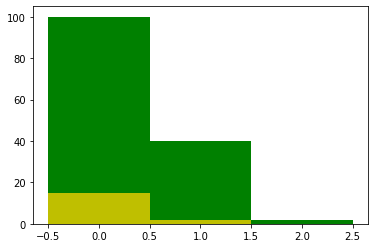

Bowler's Hitrate  :  0.30985915492957744
Bowlership's Hitrate  :  0.11764705882352941


Bowler's Skew     :  1.1728878995494725
Bowlership's Skew :  0.0
Bowler's Kurtosis     :  0.16408223595807536
Bowlership's Kurtosis :  -2.0


Greater : Statistics=4.50, p=0.28 
Two-Sided : Statistics=4.50, p=0.55 
Less : Statistics=4.50, p=0.88 

____________________________________________


Shakib Al Hasan Mahmudullah


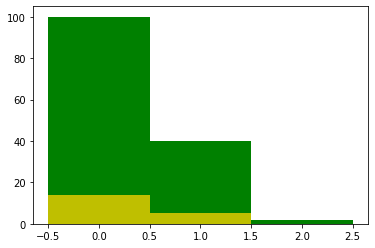

Bowler's Hitrate  :  0.30985915492957744
Bowlership's Hitrate  :  0.2631578947368421


Bowler's Skew     :  1.1728878995494725
Bowlership's Skew :  0.0
Bowler's Kurtosis     :  0.16408223595807536
Bowlership's Kurtosis :  -2.0


Greater : Statistics=4.00, p=0.39 
Two-Sided : Statistics=4.00, p=0.77 
Less : Statistics=4.00, p=0.81 

____________________________________________


Umar Gul Saeed Ajmal


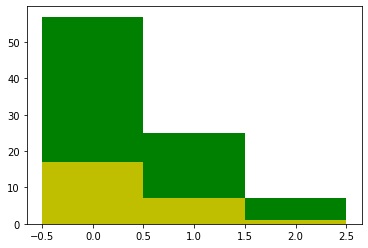

Bowler's Hitrate  :  0.43820224719101125
Bowlership's Hitrate  :  0.36


Bowler's Skew     :  1.1531434827522664
Bowlership's Skew :  0.2947996201448286
Bowler's Kurtosis     :  0.19137344709672854
Bowlership's Kurtosis :  -1.5000000000000007


Greater : Statistics=7.50, p=0.13 
Two-Sided : Statistics=7.50, p=0.27 
Less : Statistics=7.50, p=0.94 

____________________________________________


WB Rankin GH Dockrell


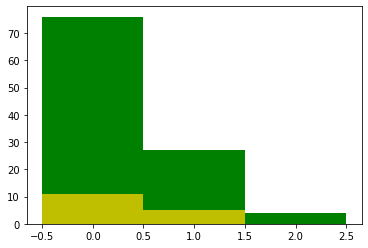

Bowler's Hitrate  :  0.32710280373831774
Bowlership's Hitrate  :  0.3125


Bowler's Skew     :  1.417925939792155
Bowlership's Skew :  0.0
Bowler's Kurtosis     :  1.0558149524943268
Bowlership's Kurtosis :  -2.0


Greater : Statistics=4.00, p=0.39 
Two-Sided : Statistics=4.00, p=0.77 
Less : Statistics=4.00, p=0.81 

____________________________________________


WB Rankin DT Johnston


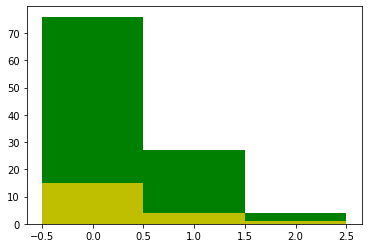

Bowler's Hitrate  :  0.32710280373831774
Bowlership's Hitrate  :  0.3


Bowler's Skew     :  1.417925939792155
Bowlership's Skew :  0.5776336923662017
Bowler's Kurtosis     :  1.0558149524943268
Bowlership's Kurtosis :  -1.5000000000000004


Greater : Statistics=7.50, p=0.13 
Two-Sided : Statistics=7.50, p=0.27 
Less : Statistics=7.50, p=0.94 

____________________________________________




In [11]:
from collections import Counter 
from scipy.stats import skew, kurtosis
from scipy.stats import mannwhitneyu

for name in Bpartner_qualified.keys():
    dfbowler = og_data.loc[og_data['bowler'] == name]
    for pname in Bpartner_qualified[name]:
        print(name,pname)
        dfpairab = paired_data.loc[paired_data['bowler1']==name] 
        dfpairab = dfpairab.loc[dfpairab['bowler2']==pname]
        dfpairba = paired_data.loc[paired_data['bowler2']==name]
        dfpairba = dfpairba.loc[dfpairba['bowler1']==pname]

        dict_1 = Counter(dict(dfpairab['wicket1'].value_counts())) 
        dict_2 = Counter(dict(dfpairba['wicket2'].value_counts()))
        fin_dict = dict(dict_1 + dict_2)
        fin_df = pd.DataFrame(fin_dict.items())
        
        pure_dict = dict(dfbowler['wicket'].value_counts())
        plt.bar(*zip(*pure_dict.items()),color='g',width=1.0)
        plt.bar(*zip(*fin_dict.items()),color='y',width=1.0)
        
        plt.show()
        
        s=0
        d=0
        for k,v in pure_dict.items():
            s = s + k*v
            d = d + v
        bh = s/d
        print("Bowler's Hitrate  : ",bh)
        s=0
        d=0
        for k,v in fin_dict.items():
            s = s + k*v
            d = d + v
        bsh = s/d 
        print("Bowlership's Hitrate  : ",bsh)
        print('\n')
        
        print("Bowler's Skew     : ",skew(dfbowler['wicket'].dropna()))
        print("Bowlership's Skew : ",skew((fin_df[1].dropna())))
        
        print("Bowler's Kurtosis     : ",kurtosis(dfbowler['wicket'].dropna()))
        print("Bowlership's Kurtosis : ",kurtosis((fin_df[1].dropna())))
        
        print('\n')
        
        alpha = 0.05

        batch_1 = dfbowler['wicket'].value_counts()
        batch_2 = fin_df[1]

        stat1, p_value1 = mannwhitneyu(batch_1, batch_2, alternative="greater") 
        print('Greater : Statistics=%.2f, p=%.2f ' % (stat1, p_value1)) 

        #if p_value1 < alpha: 
            #print('Reject Null Hypothesis => batch1 NOT GREATER than batch2') 
        #else: 
            #print('Do not Reject Null Hypothesis => batch1 GREATER THAN EQUAL TO batch2')

        stat2, p_value2 = mannwhitneyu(batch_1, batch_2, alternative="two-sided") 
        print('Two-Sided : Statistics=%.2f, p=%.2f ' % (stat2, p_value2)) 

        #if p_value2 < alpha: 
            #print('Reject Null Hypothesis => batch1 NOT EQUAL to batch2') 
        #else: 
            #print('Do not Reject Null Hypothesis => batch1 is EQUAL to batch2')

        stat3, p_value3 = mannwhitneyu(batch_1, batch_2, alternative="less") 
        print('Less : Statistics=%.2f, p=%.2f \n' % (stat3, p_value3)) 

        #if p_value3 < alpha: 
            #print('Reject Null Hypothesis => batch1 NOT LESS than batch2') 
        #else: 
            #print('Do not Reject Null Hypothesis => batch1 LESS THAN EQUAL TO batch2')

        if (p_value1 < alpha) and (p_value2 < alpha):
            print(name,"-",pname,"better than",name)
        if (p_value3 < alpha) and (p_value2 < alpha):
            print(name,"-",pname, "worse than",name)
        
        print('____________________________________________\n\n')
#print(fin_dict)
#print(fin_df)